# Data preparation

In [45]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("white")

#### Load the data

In [46]:
df_episodes1 = pd.read_csv("../results/20240428-17.08.30_baseline_original/logs/explain/20240428-17.08.30_baseline_original_episodes.csv", header=None)
# add column names
df_episodes1.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'dataset']
df_episodes1['ewm_reward'] = df_episodes1['reward'].ewm(alpha=0.0001).mean()
df_episodes1['ewm_wins'] = df_episodes1['flag'].ewm(alpha=0.0001).mean()

In [47]:
df_episodes2 = pd.read_csv("../results/20240428-20.22.58_baseline_B2/logs/explain/20240428-20.22.58_baseline_B2_episodes.csv", header=None)
# add column names
df_episodes2.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'dataset']
df_episodes2['ewm_reward'] = df_episodes2['reward'].ewm(alpha=0.0001).mean()
df_episodes2['ewm_wins'] = df_episodes2['flag'].ewm(alpha=0.0001).mean()

In [48]:
df_episodes3 = pd.read_csv("../results/20240501-13.15.31_target_T1/logs/explain/20240501-13.15.31_target_T1_episodes.csv", header=None)
# add column names
df_episodes3.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'dataset']
df_episodes3['ewm_reward'] = df_episodes3['reward'].ewm(alpha=0.0001).mean()
df_episodes3['ewm_wins'] = df_episodes3['flag'].ewm(alpha=0.0001).mean()

In [49]:
df_episodes4 = pd.read_csv("../results/20240428-23.29.56_target_T2/logs/explain/20240428-23.29.56_target_T2_episodes.csv", header=None)
# add column names
df_episodes4.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'dataset']
df_episodes4['ewm_reward'] = df_episodes4['reward'].ewm(alpha=0.0001).mean()
df_episodes4['ewm_wins'] = df_episodes4['flag'].ewm(alpha=0.0001).mean()

In [50]:
df_episodes5 = pd.read_csv("../results/20240430-12.00.19_C1/logs/explain/20240430-12.00.19_C1_episodes.csv", header=None)
# add column names
df_episodes5.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'dataset']
df_episodes5['ewm_reward'] = df_episodes5['reward'].ewm(alpha=0.0001).mean()
df_episodes5['ewm_wins'] = df_episodes5['flag'].ewm(alpha=0.0001).mean()

In [51]:
df_episodes6 = pd.read_csv("../results/20240502-16.09.35_P1/logs/explain/20240502-16.09.35_P1_episodes.csv", header=None)
# add column names
df_episodes6.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'dataset']
df_episodes6['ewm_reward'] = df_episodes6['reward'].ewm(alpha=0.0001).mean()
df_episodes6['ewm_wins'] = df_episodes6['flag'].ewm(alpha=0.0001).mean()

In [52]:
df_episodes7 = pd.read_csv("../results/20240504-16.04.37_P1_compact/logs/explain/20240504-16.04.37_P1_compact_episodes.csv", header=None)
# add column names
df_episodes7.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'dataset']
df_episodes7['ewm_reward'] = df_episodes7['reward'].ewm(alpha=0.0001).mean()
df_episodes7['ewm_wins'] = df_episodes7['flag'].ewm(alpha=0.0001).mean()

In [53]:
df_episodes8 = pd.read_csv("../results/20240505-14.05.33_B1/logs/explain/20240505-14.05.33_B1_episodes.csv", header=None)
# add column names
df_episodes8.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'dataset']
df_episodes8['ewm_reward'] = df_episodes8['reward'].ewm(alpha=0.0001).mean()
df_episodes8['ewm_wins'] = df_episodes8['flag'].ewm(alpha=0.0001).mean()

In [54]:
df_episodes9 = pd.read_csv("../results/20240507-19.00.38_B2/logs/explain/20240507-19.00.38_B2_episodes.csv", header=None)
# add column names
df_episodes9.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'dataset']
df_episodes9['ewm_reward'] = df_episodes9['reward'].ewm(alpha=0.0001).mean()
df_episodes9['ewm_wins'] = df_episodes9['flag'].ewm(alpha=0.0001).mean()


In [55]:
df_episodes10 = pd.read_csv("../results/20240506-19.13.18_P1/logs/explain/20240506-19.13.18_P1_episodes.csv", header=None)
# add column names
df_episodes10.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'dataset']
df_episodes10['ewm_reward'] = df_episodes10['reward'].ewm(alpha=0.0001).mean()
df_episodes10['ewm_wins'] = df_episodes10['flag'].ewm(alpha=0.0001).mean()

In [56]:
df_episodes11 = pd.read_csv("../results/20240508-08.24.38_C1/logs/explain/20240508-08.24.38_C1_episodes.csv", header=None)
# add column names
df_episodes11.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'dataset']
df_episodes11['ewm_reward'] = df_episodes11['reward'].ewm(alpha=0.0001).mean()
df_episodes11['ewm_wins'] = df_episodes11['flag'].ewm(alpha=0.0001).mean()

In [57]:
df_episodes12 = pd.read_csv("../results/20240509-09.28.21_T2_ext_ni/logs/explain/20240509-09.28.21_T2_ext_ni_episodes.csv", header=None)
# add column names
df_episodes12.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'dataset']
df_episodes12['ewm_reward'] = df_episodes12['reward'].ewm(alpha=0.0001).mean()
df_episodes12['ewm_wins'] = df_episodes12['flag'].ewm(alpha=0.0001).mean()

In [58]:
df_episodes13 = pd.read_csv("../results/20240510-09.15.32_T2_ext_i/logs/explain/20240510-09.15.32_T2_ext_i_episodes.csv", header=None)
# add column names
df_episodes13.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'dataset']
df_episodes13['ewm_reward'] = df_episodes13['reward'].ewm(alpha=0.0001).mean()
df_episodes13['ewm_wins'] = df_episodes13['flag'].ewm(alpha=0.0001).mean()

In [59]:
df_episodes14 = pd.read_csv("../results/20240511-11.23.06_T1_ext_ni/logs/explain/20240511-11.23.06_T1_ext_ni_episodes.csv", header=None)
# add column names
df_episodes14.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'dataset']
df_episodes14['ewm_reward'] = df_episodes14['reward'].ewm(alpha=0.0001).mean()
df_episodes14['ewm_wins'] = df_episodes14['flag'].ewm(alpha=0.0001).mean()

In [101]:
df_episodes15 = pd.read_csv("../results/20240512-10.23.55_P1_ext_ni/logs/explain/20240512-10.23.55_P1_ext_ni_episodes.csv", header=None)
# add column names
df_episodes15.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'dataset']
df_episodes15['ewm_reward'] = df_episodes15['reward'].ewm(alpha=0.0001).mean()
df_episodes15['ewm_wins'] = df_episodes15['flag'].ewm(alpha=0.0001).mean()
df_episodes15.head(5)

,timestamp,name,seed,total_steps,episode,episode_steps,reward,distance,velocity,game_time,game_score,flag,loss,epsilon,dataset,ewm_reward,ewm_wins
0,2024-05-12 10:24:13.946,game_episodes,13,673,1,673,709.0,898,6.701493,266,200,False,0.842807,0.997437,P1_ext_ni,709.000000,0.0
1,2024-05-12 10:24:58.583,game_episodes,13,2423,2,1750,493.0,898,2.565714,50,300,False,0.599849,0.990653,P1_ext_ni,600.994600,0.0
2,2024-05-12 10:25:01.607,game_episodes,13,2537,3,114,585.0,664,30.181818,378,300,False,0.566739,0.990212,P1_ext_ni,595.662533,0.0
3,2024-05-12 10:25:07.836,game_episodes,13,2774,4,237,796.0,898,19.106383,353,400,False,0.846873,0.989298,P1_ext_ni,645.754413,0.0
4,2024-05-12 10:25:08.618,game_episodes,13,2801,5,27,247.0,310,62.000000,395,200,False,0.722694,0.989193,P1_ext_ni,565.987579,0.0


In [128]:
df_episodes16 = pd.read_csv("../results/20240513-18.01.40_T2-ni/logs/explain/20240513-18.01.40_T2-ni_episodes.csv", header=None)
# add column names
df_episodes16.columns =['timestamp', 'name', 'seed', 'total_steps', 'episode', 'episode_steps', 'reward', 'distance', 'velocity', 'game_time', 'game_score', 'flag', 'loss', 'epsilon', 'dataset']
df_episodes16['ewm_reward'] = df_episodes16['reward'].ewm(alpha=0.0001).mean()
df_episodes16['ewm_wins'] = df_episodes16['flag'].ewm(alpha=0.0001).mean()
df_episodes16.head(5)

,timestamp,name,seed,total_steps,episode,episode_steps,reward,distance,velocity,game_time,game_score,flag,loss,epsilon,dataset,ewm_reward,ewm_wins
0,2024-05-13 18:02:08.648,game_episodes,13,1064,1,1064,631.0,898,4.235849,188,100,False,0.556482,0.995917,T2_ni,631.000000,0.0
1,2024-05-13 18:02:09.624,game_episodes,13,1099,2,35,234.0,298,49.666667,394,0,False,0.635247,0.995781,T2_ni,432.490075,0.0
2,2024-05-13 18:02:13.541,game_episodes,13,1248,3,149,638.0,722,24.896552,371,0,False,0.590840,0.995203,T2_ni,501.000234,0.0
3,2024-05-13 18:02:50.222,game_episodes,13,2571,4,1323,1350.0,1671,6.329545,136,400,False,0.271077,0.990081,T2_ni,713.282015,0.0
4,2024-05-13 18:03:25.476,game_episodes,13,3680,5,1109,1242.0,1520,6.877828,179,400,False,0.427263,0.985808,T2_ni,819.046763,0.0


In [129]:
concatenated_5000 = pd.concat([df_episodes1, df_episodes2, df_episodes3, df_episodes4, df_episodes5, df_episodes6, df_episodes7])

In [130]:
concatenated_10000 = pd.concat([df_episodes8, df_episodes9, df_episodes10, df_episodes11, df_episodes16])

In [131]:
concatenated_10000_ext = pd.concat([df_episodes8, df_episodes9, df_episodes12, df_episodes13, df_episodes14, df_episodes15])

- total_steps: the total of steps executed during the run
- episode: the episode over which the data is aggregated
- episode_steps: the number of steps in the episode
- reward: the total reward accumulated during the episode
- distance: the distance to the right achieved during the episode
- velocity: distance / (400 - game_time). This is an indication of how long it took to reach the distance
- game_time: the number of ticks on the game clock (countdown from 400)
- game_score: the score achieved in the game
- flag: indication whether Mario reached the flag during the episode
- loss: the loss 
- epsilon: the epsilon applied to the episode


#### plot the reward, distance and velocity per episode

<Axes: xlabel='episode', ylabel='reward'>

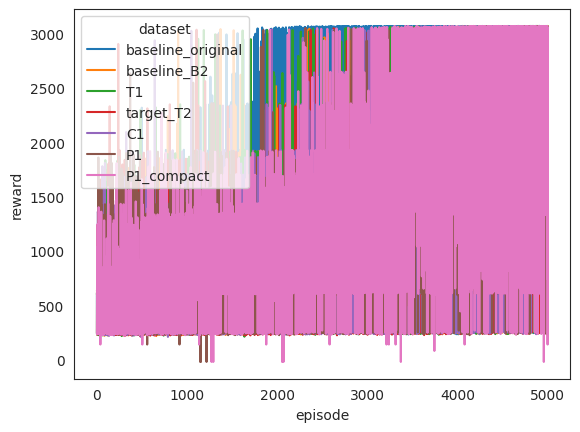

In [132]:
sns.lineplot(x='episode', y='reward', data=concatenated_5000, hue='dataset')

<Axes: xlabel='episode', ylabel='ewm_reward'>

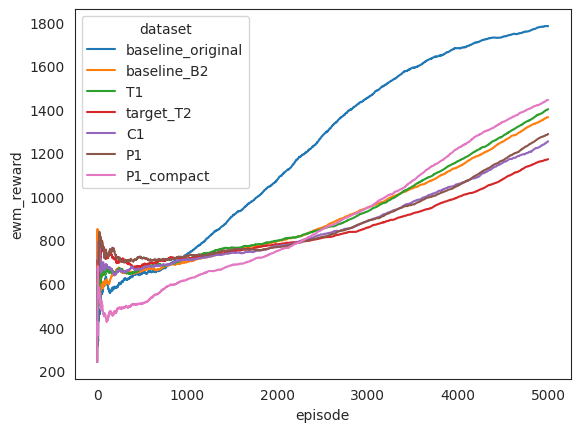

In [133]:
sns.lineplot(x='episode', y='ewm_reward', data=concatenated_5000, hue='dataset')

<Axes: xlabel='episode', ylabel='ewm_reward'>

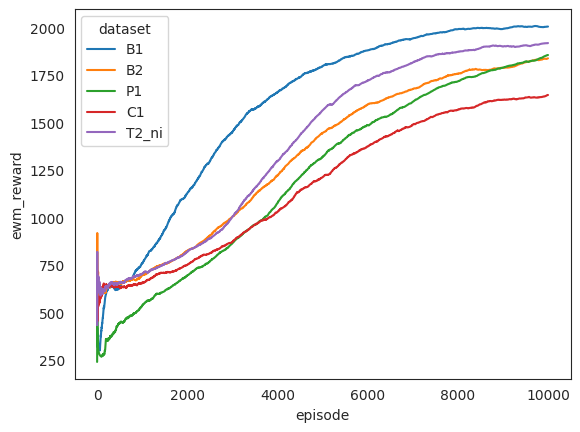

In [134]:
sns.lineplot(x='episode', y='ewm_reward', data=concatenated_10000, hue='dataset')

<Axes: xlabel='episode', ylabel='ewm_reward'>

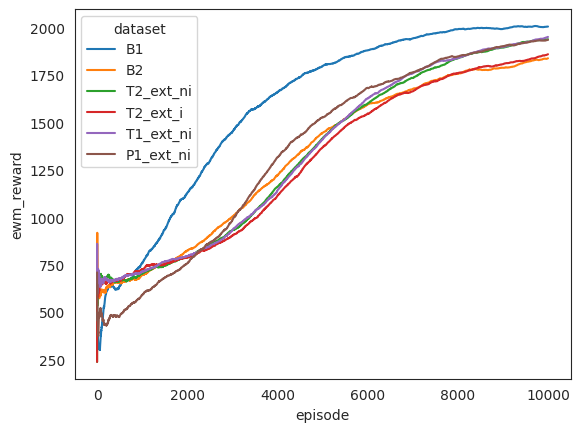

In [135]:
sns.lineplot(x='episode', y='ewm_reward', data=concatenated_10000_ext, hue='dataset')

Because of the epsilon during the reinforcement learning process, Mario can still die early late in the process, causing the rewards go all over the place.
Group the data in bins of 1000 and calculate the aggregates

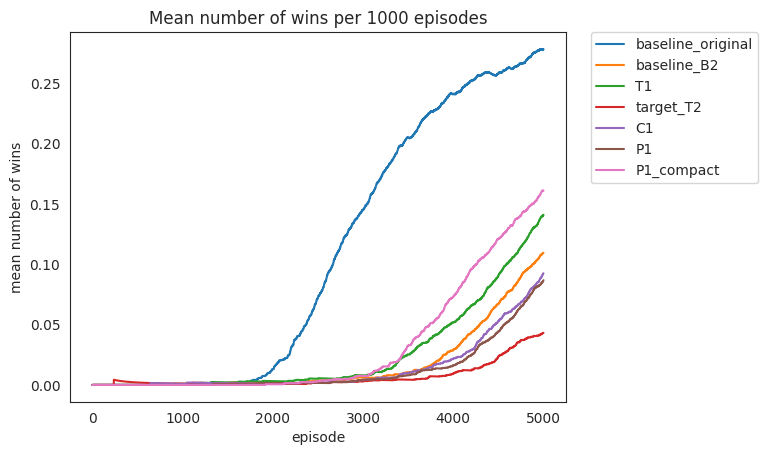

In [136]:
sns.lineplot(x='episode', y='ewm_wins', data=concatenated_5000, hue='dataset').set(title='Mean number of wins per 1000 episodes', xlabel="episode", ylabel="mean number of wins")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

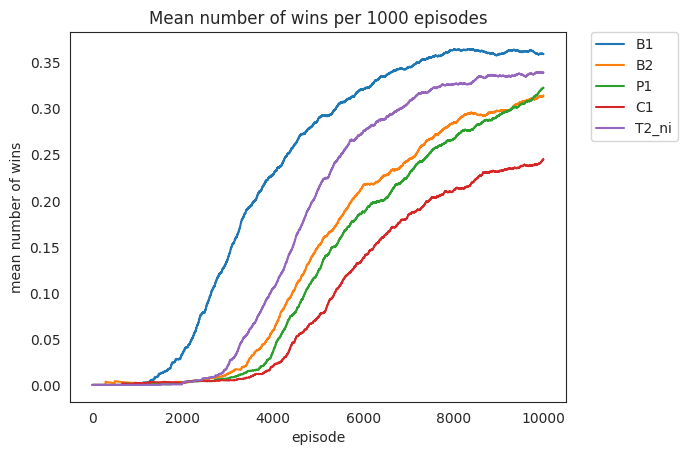

In [137]:
sns.lineplot(x='episode', y='ewm_wins', data=concatenated_10000, hue='dataset').set(title='Mean number of wins per 1000 episodes', xlabel="episode", ylabel="mean number of wins")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

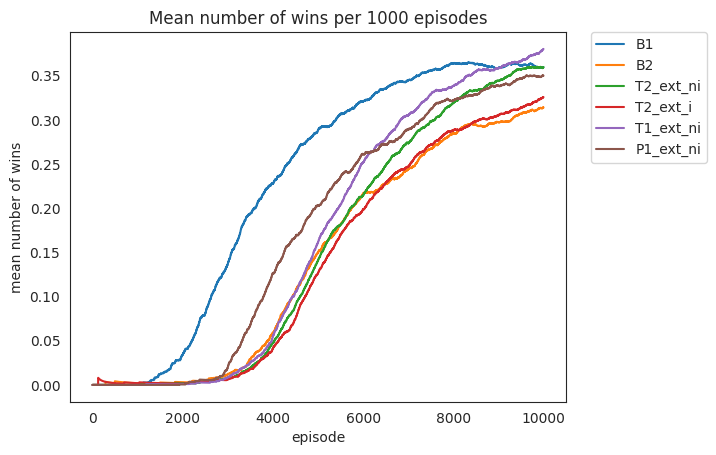

In [138]:
sns.lineplot(x='episode', y='ewm_wins', data=concatenated_10000_ext, hue='dataset').set(title='Mean number of wins per 1000 episodes', xlabel="episode", ylabel="mean number of wins")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Show epsilon decay over time for both versions to determine if the high-epsilon interval is big enough

<Axes: xlabel='episode', ylabel='epsilon'>

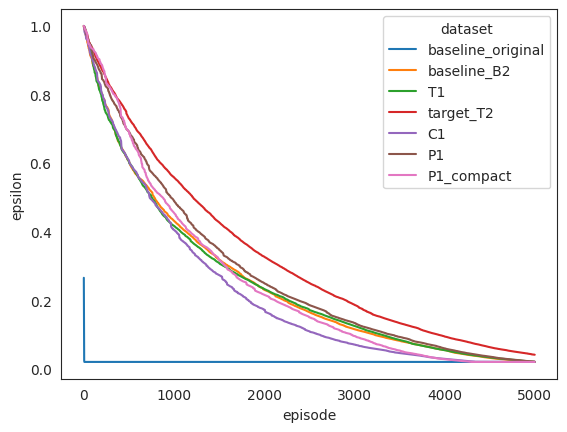

In [139]:
sns.lineplot(x='episode', y='epsilon', data=concatenated_5000, hue='dataset')

<Axes: xlabel='episode', ylabel='epsilon'>

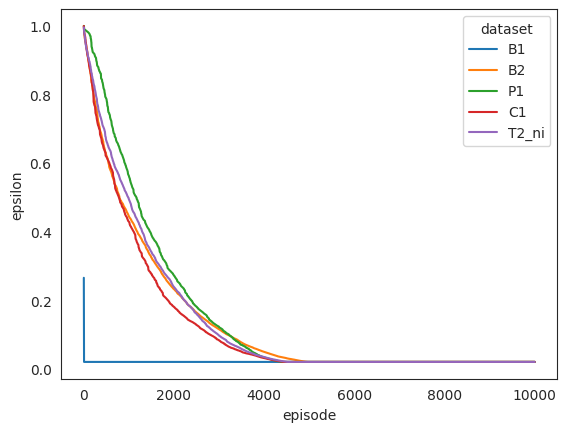

In [140]:
sns.lineplot(x='episode', y='epsilon', data=concatenated_10000, hue='dataset')